# 9. Heatmaps and Merging Operations


## Heatmaps
A `pandas` dataframe can be visualized by means of a so-called heatmap. A heatmap consists of tiles at each data point that adheres to a chosen color palette.

Many plotting libraries offer the possibility of creating heatmaps. A common one is called `seaborn`, which is built on top of `matplotlib` to enhance certain plot types.

Before the dataframe can be plotted to a heatmap, it needs to be in the right format. 
If we for example have a dataframe with $x$-values in one column, $y$-values in another and the values to be plotted in a third column we can pivot the data to a new dataframe:

In [1]:
import pandas as pd

# Creata a dummy dataframe
df = pd.DataFrame({
    'x': [1, 1, 1, 2, 2, 2, 3, 3, 3],
    'y': ['a', 'b', 'c', 'a', 'b', 'c', 'a', 'b', 'c'],
    'values': [34, 74, 1, 9, -36, -24, 47, -27, 47]})

df

,x,y,values
0,1,a,34
1,1,b,74
2,1,c,1
3,2,a,9
4,2,b,-36
5,2,c,-24
6,3,a,47
7,3,b,-27
8,3,c,47


In [2]:
# Pivot the dataframe
df_pivot = df.pivot(index='y', columns='x', values='values')
df_pivot

x,1,2,3
y,,,
a,34,9,47
b,74,-36,-27
c,1,-24,47



A heatmap can be created from a dataframe like this:



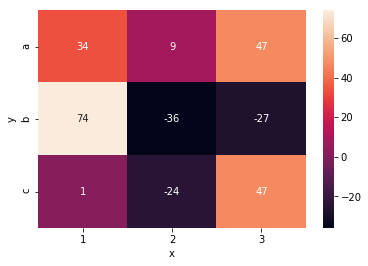

In [4]:
import seaborn as sns

# Plot the pivotted dataframe as a heatmap
sns.heatmap(df_pivot, annot=True)

> **Note:** Make sure you have installed the `seaborn` library before using this. Otherwise a `ModuleNotFoundError` will be raised.

## Heatmap parameters
`seaborn.heatmap` has many parameters for tweaking the appearance of the colormap. Often a bunch of them are needed to create a good looking plot. 

Special attention should be paid to choosing a colormap that fits the dataset well. 

>**A poor chosen colormap can be very misleading to the reader of the plot, while a well-chosen one can convey the overall message to the reader in very few seconds.**

See https://seaborn.pydata.org/generated/seaborn.heatmap.html

Some of the parameters for `seaborn.heatmap`:

* `annot=True` for annotating the value in each tile.
* `fmt` to set the number of decimals for the annotated tiles. Set equal to `".0f"` for 0 decimals.
* `annot_kws={'size': 10}` for setting font size of annotated tiles to 10.
* `square=True` for ensuring that tiles are square.
* `cmap=name_of_colormap` for controlling the colormap (see available colormaps here: https://matplotlib.org/users/colormaps.html, be sure to choose one that fits the content of the data).
* `vmin` and `vmax` to define the min and max values of the colormap (and colorbar).
* `cbar_kws={"orientation": "horizontal"}` for orientation of the colorbar. Here set to horizontal but is vertical as default.


## Merge operations on dataframes

Merge operations provide very powerful manipulation techniques in `pandas`. We are only going to look at a simple example here, which will perform an operation similar to Excel's `VLOOKUP`.

---
~~~python
# Merge df1 and df2 on <column_to_merge_on>, retain only rows from df1  (similar to Excel VLOOKUP)
df_merged = df1.merge(df2, on='<column_to_merge_on>', how='left')
~~~
---

See this page of the `pandas` documentation for more on merging, joining and concatenating DataFrames: https://pandas.pydata.org/pandas-docs/stable/user_guide/merging.html

# Exercise 1

The file `piles.csv` in the session folder contains some steel piles and their profile type. Use `steel_profiles.csv` to insert the cross sectional parameters in each pile row. Use the merging operation described above.  

# Exercise 2

The file `crack_width_Seg7_y_direction.csv` has results of a crack width calculation for a concrete slab. 

While doing the exercises below, recall that `df.head()` will print the first five rows of `df`.

## Exercise 2.1
Load the file `crack_width_Seg7_y_direction.csv` into a dataframe. Filter the dataframe so it only contains rows where the `criterion` column is `max My`.

## Exercise 2.2 
Pivot the dataframe and save it to a new dataframe. Use column `'y[m]'` as index, column `'x[m]'` as columns and column `'w_k[mm]'` as values.

## Exercise 2.3
Create a heatmap of the pivotted dataframe. Use parameters of your choice from the ones described above or in the `pandas` documentation.

Be sure to choose a colormap, the default one is awful. The maximum allowable crack width for this concrete slab is $w_{k.max} = 0.30$mm.


# End of exercises

*The cell below is for setting the style of this document. It's not part of the exercises.*

In [5]:
from IPython.display import HTML
HTML('<style>{}</style>'.format(open('../css/cowi.css').read()))